In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV


# **1- Glass Dataset**

In [ ]:
# Importing glass dataset

glass=pd.read_csv("/content/glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
# Checking info

glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
# Spliting data in to X and Y.

x=glass.iloc[:,0:9]
y=glass.iloc[:,-1]

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# KNN Model building

kfold=KFold(n_splits=12)

model=KNeighborsClassifier(n_neighbors=8)
model.fit(x,y)

result=cross_val_score(model,x,y,cv=kfold)
result.mean()*100

51.06209150326797

# **Grid Search Algorithm for Hyperparameter Tuning**

In [ ]:
neighbors=list(range(1,33))
param_grid={"n_neighbors":neighbors}

In [ ]:
# model building for hyperparameter tunnuing

model1=KNeighborsClassifier()
grid=GridSearchCV(estimator=model1,param_grid=param_grid)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [ ]:
# Printing best score and params

print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


## **Visualizing the CV results**

In [ ]:
#For getting an optimal value of K for KNN

k_range=range(1,60)
k_score=[]


for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  score=cross_val_score(knn,x,y,cv=4)
  k_score.append(score.mean())

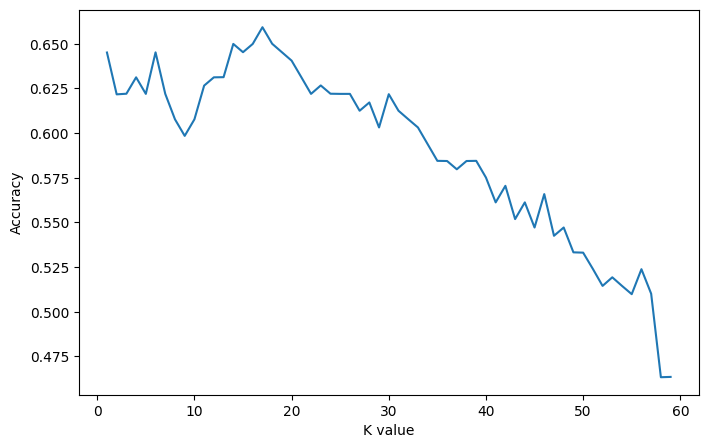

In [ ]:
# Visualizing the result

plt.figure(figsize=(8,5))
plt.plot(k_range,k_score)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# Checking the accuracy.

accuracy=pd.DataFrame({"k value":range(1,60),"Accuracy":k_score})
accuracy

,k value,Accuracy
0,1,0.645091
1,2,0.621681
2,3,0.622030
3,4,0.631202
4,5,0.621943
5,6,0.645178
6,7,0.621943
7,8,0.607704
8,9,0.598445
9,10,0.607704


In [ ]:
# Sorting according the highest accuracy value

accuracy.sort_values("Accuracy",ascending=False)

,k value,Accuracy
16,17,0.659242
17,18,0.649983
15,16,0.649895
13,14,0.649895
18,19,0.645266
14,15,0.645266
5,6,0.645178
0,1,0.645091
19,20,0.640549
12,13,0.631289


**From the above result we can conclude that K-value rangfing from(0-60) 17 gives the highest accuracy  of 65%**

# **2- ZOO Dataset**

In [ ]:
# Importing the dataset

zoo=pd.read_csv("/content/Zoo.csv")
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
# Checking the information of the data

zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
# Cheking null values if any
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [ ]:
# Diving the data into X & Y

X=zoo.iloc[:,1:18]
Y=zoo.iloc[:,-1]

In [ ]:
# KNN Model building

kfold2=KFold(n_splits=12)

model2=KNeighborsClassifier(n_neighbors=12)
model2.fit(X,Y)

result2=cross_val_score(model2,X,Y,cv=kfold2)
result2.mean()*100 # Checking the mean

79.8611111111111

# **Grid Search Algorithm for Hyperparameter Tuning**

In [ ]:
neighbor1=list(range(1,40))
pram={"n_neighbors":neighbor1}

In [ ]:
# building model for Hyperparameter Tuning

model2=KNeighborsClassifier()
grid2=GridSearchCV(estimator=model2,param_grid=pram)

grid2.fit(X,Y)
print(grid2.best_score_)
print(grid2.best_params_)

1.0
{'n_neighbors': 1}


**Visualizing the CV results**

In [ ]:
k_range=range(1,40)
k_scores=[]

for k in k_range:
  knn1=KNeighborsClassifier(n_neighbors=k)
  score=cross_val_score(knn1,X,Y,cv=4)
  k_scores.append(score.mean())


In [ ]:
k_scores

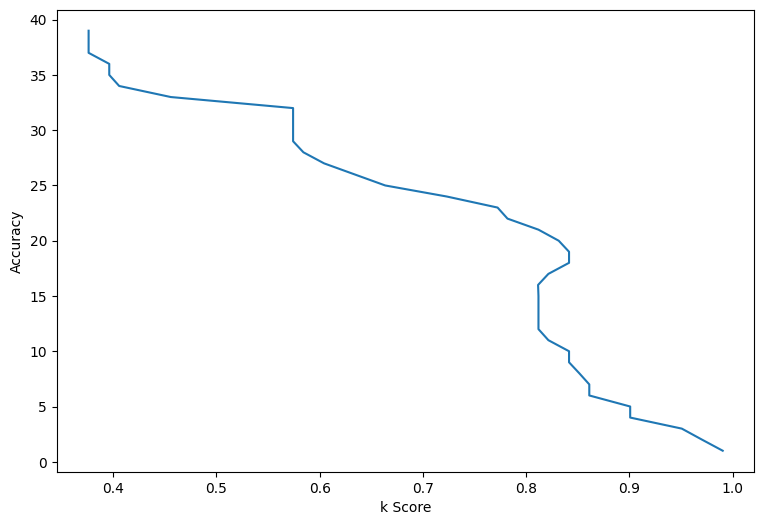

In [ ]:
#Visuliazing the result
plt.figure(figsize=(9,6))
plt.plot(k_scores,k_range)
plt.xlabel("k Score")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# Cheking the accuracy

Accuracy1=pd.DataFrame({"K-Range":range(1,40),"K-score":k_scores})
Accuracy1

,K-Range,K-score
0,1,0.990385
1,2,0.970385
2,3,0.950769
3,4,0.900769
4,5,0.900769
5,6,0.861154
6,7,0.861154
7,8,0.851538
8,9,0.841538
9,10,0.841538


In [ ]:
# Sorting the accuracy from Higest to lowest

Accuracy1.sort_values("K-score",ascending=False)

,K-Range,K-score
0,1,0.990385
1,2,0.970385
2,3,0.950769
3,4,0.900769
4,5,0.900769
5,6,0.861154
6,7,0.861154
7,8,0.851538
17,18,0.841538
8,9,0.841538


**From above result we can see that K-value of 1 give higest accuracy of 99%**